In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
fraud= pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Fraud_detection.csv')

In [134]:
fraud[:5]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [135]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,100165.000000,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,100165.000000
mean,8.502112,1.736458e+05,8.801756e+05,8.965348e+05,8.810839e+05,1.184639e+06,0.001158
std,1.825055,3.442910e+05,2.676095e+06,2.714232e+06,2.402387e+06,2.802252e+06,0.034011
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,9.970160e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.285289e+04,2.008500e+04,0.000000e+00,2.091500e+04,5.048120e+04,0.000000
75%,10.000000,2.119434e+05,1.910560e+05,2.154246e+05,5.891912e+05,1.061043e+06,0.000000
max,10.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.400000e+07,3.890000e+07,1.000000


In [136]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100165 entries, 0 to 100164
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100165 non-null  int64  
 1   type            100165 non-null  object 
 2   amount          100165 non-null  float64
 3   nameOrig        100165 non-null  object 
 4   oldbalanceOrg   100165 non-null  float64
 5   newbalanceOrig  100165 non-null  float64
 6   nameDest        100165 non-null  object 
 7   oldbalanceDest  100165 non-null  float64
 8   newbalanceDest  100165 non-null  float64
 9   isFraud         100165 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


### three object datatype that needs to be preprocessed

In [137]:
fraud.isnull().sum()           ## no null values , so no need for imputation

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### Plotting the graph

Text(0, 0.5, 'isFraud')

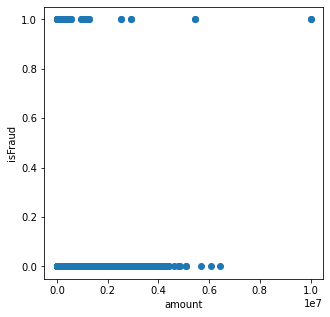

In [138]:
plt.figure(figsize=(5,5))
plt.scatter(x='amount',y='isFraud',data=fraud)
plt.xlabel('amount')
plt.ylabel('isFraud')

In [139]:
fraud['isFraud'].value_counts()         ##fradualent transations is very low

0    100049
1       116
Name: isFraud, dtype: int64

In [140]:
116/100049*100

0.1159431878379594

### 11% of fradulent transactions

Text(0, 0.5, 'isFraud')

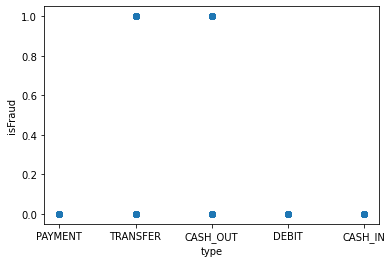

In [141]:
plt.scatter(x='type',y='isFraud',data=fraud)
plt.xlabel('type')
plt.ylabel('isFraud')

###  based on the above plot, tranfer and cash-out consists of fraudulent  trnasactions

###  Preprocessing

In [142]:
fraud['type'].value_counts()

PAYMENT     39552
CASH_OUT    30772
CASH_IN     20248
TRANSFER     8603
DEBIT         990
Name: type, dtype: int64

In [143]:
fraud['type'] = fraud['type'].map({'PAYMENT':1,'CASH_OUT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})
fraud["isFraud"] = fraud["isFraud"].map({0: "No Fraud", 1: "Fraud"})

In [144]:
fraud[:3]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud


In [145]:
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [155]:
x = np.array(fraud[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(fraud["isFraud"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 45)

In [212]:
knn =KNeighborsClassifier(n_neighbors=1)

In [213]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [214]:
y_pred =knn.predict(x_test)

In [215]:
accuracy_score(y_pred,y_test)

0.9992512354614885

In [216]:
input_data = np.array([[4, 5000.60, 3000.60, 0.0]])
print(knn.predict(input_data))

['No Fraud']


In [217]:
input_data = np.array([[4, 10000000, 12900000, 2930418.44]])
print(knn.predict(input_data))

['Fraud']


###  Naivebayes

In [218]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [219]:
x = np.array(fraud[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(fraud["isFraud"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 45)

### GaussianNB

In [220]:
model=GaussianNB()

model.fit(x_train,y_train)

GaussianNB()

In [221]:
y_pred =model.predict(x_test)

In [222]:
acc =accuracy_score(y_test,y_pred)
acc

0.9784854989267708

 ###  MultinomilaNB

 model=MultinomialNB()

In [223]:
model.fit(x_train,y_train)

GaussianNB()

In [224]:
y_pred =model.predict(x_test)

In [225]:
acc =accuracy_score(y_test,y_pred)
acc

0.9784854989267708

### BernoulliNB

In [226]:
 model=BernoulliNB()

In [227]:
model.fit(x_train,y_train)

BernoulliNB()

In [228]:
y_pred =model.predict(x_test)

In [229]:
acc =accuracy_score(y_test,y_pred)
acc

0.9988019767383817

### Since this is a categorical variable (binary) , bernoulliNB gives the utmost accuracy

In [230]:
print(classification_report(y_test , y_pred))

C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        24
    No Fraud       1.00      1.00      1.00     20009

    accuracy                           1.00     20033
   macro avg       0.50      0.50      0.50     20033
weighted avg       1.00      1.00      1.00     20033



C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
